<a href="https://colab.research.google.com/github/aysedata/DEEP-LEARNING/blob/main/DL_S6_(Image_Classification_with_CNN_CIFAR10_BATCH%20NORMALIZATION)_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

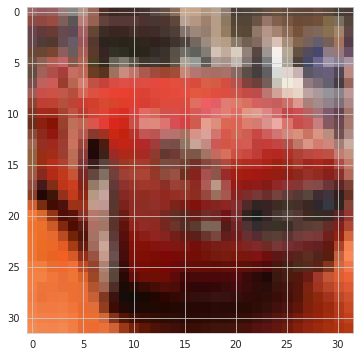

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [ ]:
# pd.Series(y_train.flatten()).value_counts()

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
classes[y_train[0][0]]

'frog'

In [ ]:
classes[int(y_train[0])]

'frog'

In [ ]:
#int(np.random.randint(low=0, high=50000, size=1))

In [ ]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

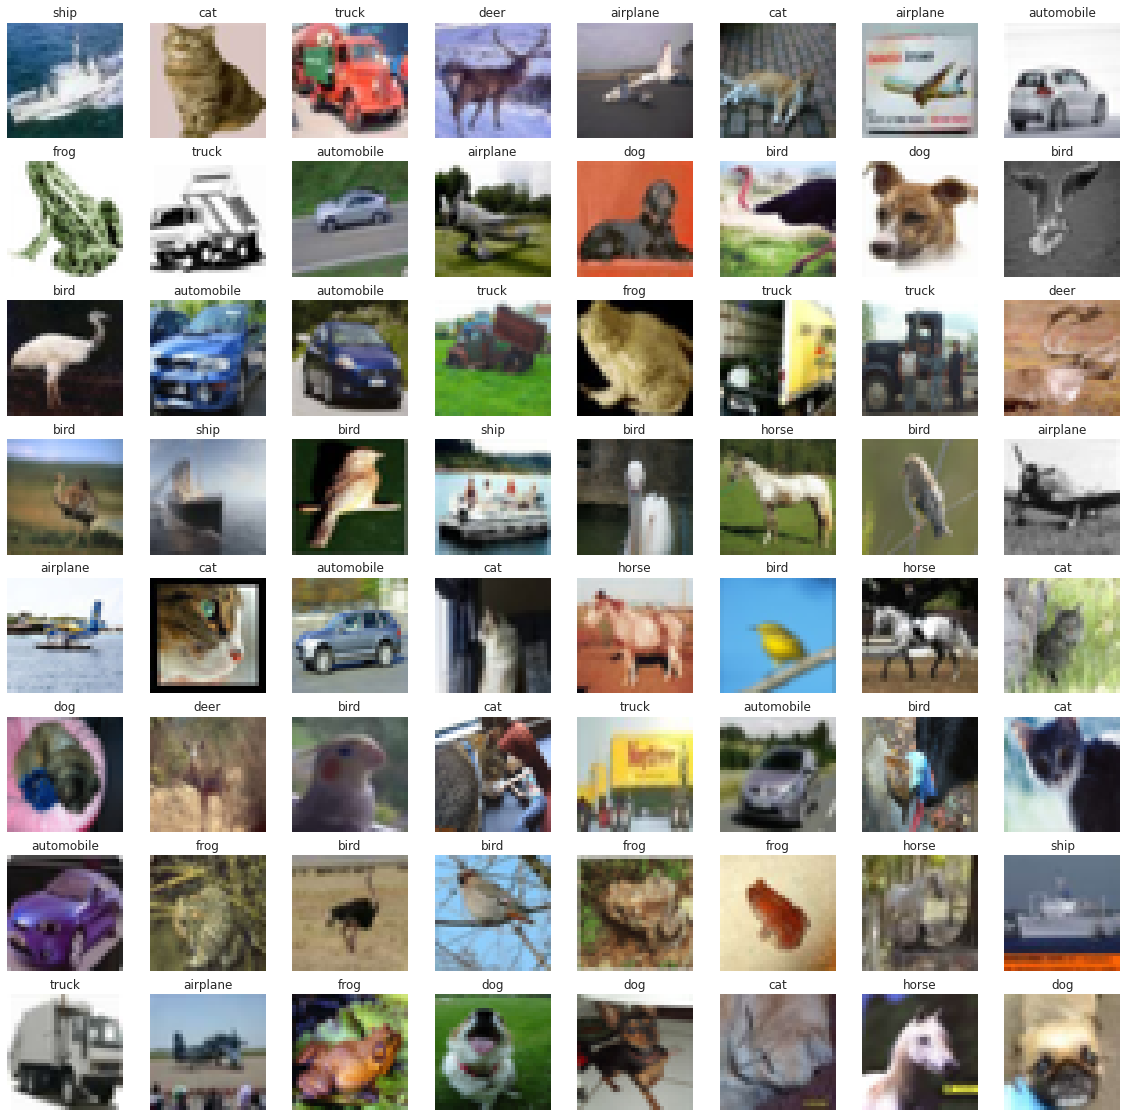

In [15]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [16]:
X_train[5].min()

0

In [17]:
X_train[5].max()

252

In [18]:
# Normalize image pixels
#SCALE

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
X_train[5].min()

0.0

In [20]:
X_train[5].max()

0.9882353

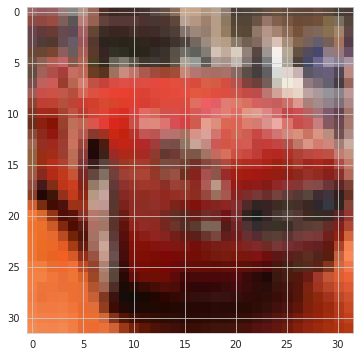

In [21]:
plt.imshow(X_train[5])

In [22]:
X_train.shape, X_test.shape
#(adet resim, kaca kac,RGB=3)

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [23]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
#to categorical softmax tahmin ederken array seklinde to categorical olarak probability degerlerine gore tahmin yapacak
from tensorflow.keras.utils import to_categorical

In [25]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [26]:
y_train[0]

array([6], dtype=uint8)

In [27]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#(none,32,32,32) = kaca kac, filter sayim

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
#monitor val. accuracy olursa mode=max ekle , val-loss ise min

In [34]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 16s 5ms/step - loss: 1.4395 - accuracy: 0.4816 - val_loss: 1.1735 - val_accuracy: 0.5816
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0534 - accuracy: 0.6285 - val_loss: 0.9701 - val_accuracy: 0.6617
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9092 - accuracy: 0.6797 - val_loss: 0.9406 - val_accuracy: 0.6712
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8201 - accuracy: 0.7141 - val_loss: 0.9072 - val_accuracy: 0.6851
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7461 - accuracy: 0.7384 - val_loss: 0.8987 - val_accuracy: 0.6892
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6813 - accuracy: 0.7601 - val_loss: 0.9043 - val_accuracy: 0.6894
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6221 - accuracy: 0.7817 - val_loss: 0.9028 - val_accuracy

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,1.439,0.482,1.174,0.582
1,1.053,0.628,0.970,0.662
2,0.909,0.680,0.941,0.671
3,0.820,0.714,0.907,0.685
4,0.746,0.738,0.899,0.689
5,0.681,0.760,0.904,0.689
6,0.622,0.782,0.903,0.698


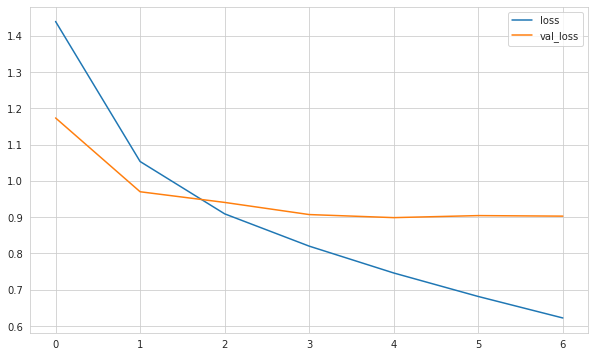

In [37]:
summary[["loss", "val_loss"]].plot();

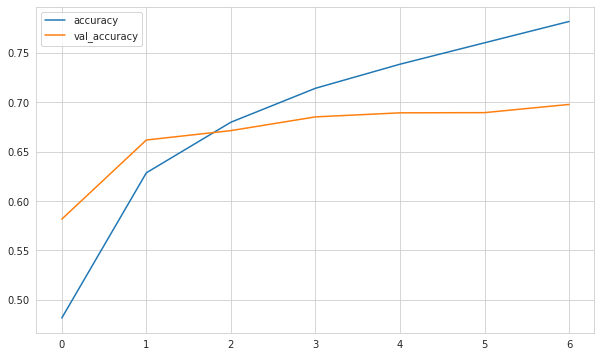

In [38]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8987 - accuracy: 0.6892


[0.8987168669700623, 0.6891999840736389]

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8987168669700623
Test accuracy: 0.6891999840736389


In [42]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[7.2554358e-05, 2.2415767e-04, 4.6628245e-04, ..., 3.4040128e-04,
        4.0695928e-03, 4.1553430e-05],
       [2.6799249e-03, 1.6942784e-01, 2.9031637e-06, ..., 1.8178876e-07,
        8.2571250e-01, 2.1602893e-03],
       [2.0461923e-01, 2.9343795e-02, 1.9496570e-03, ..., 3.4154771e-04,
        7.2330099e-01, 3.8640376e-02],
       ...,
       [5.7655827e-05, 3.7706807e-06, 8.3650611e-02, ..., 1.0807955e-01,
        2.6313140e-04, 6.4286913e-05],
       [8.1126532e-03, 2.8184591e-02, 1.2858504e-02, ..., 7.8936107e-03,
        1.6805143e-03, 1.3136370e-04],
       [3.2864996e-06, 5.0006911e-06, 1.3079353e-04, ..., 9.8922861e-01,
        4.2592706e-07, 2.2166764e-06]], dtype=float32)

In [43]:
y_pred = np.argmax(pred_prob, axis=1)

In [44]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1000
           1       0.86      0.70      0.77      1000
           2       0.53      0.62      0.57      1000
           3       0.55      0.47      0.51      1000
           4       0.65      0.60      0.63      1000
           5       0.67      0.52      0.58      1000
           6       0.69      0.85      0.76      1000
           7       0.72      0.80      0.76      1000
           8       0.85      0.73      0.79      1000
           9       0.69      0.83      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [46]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [47]:
print(confusion_matrix(y_test, y_pred))

[[762  11  68  27  15   4  18  11  36  48]
 [ 23 698  17  13   1   2  13   8  27 198]
 [ 52   3 624  44  85  52  77  37  11  15]
 [ 15  11 109 465  82 114 113  52  13  26]
 [ 18   1 119  43 604  24  91  88   9   3]
 [ 11   3  99 174  54 517  47  78   8   9]
 [  5   1  49  37  21  12 854   8   4   9]
 [ 17   0  51  16  49  35  12 802   5  13]
 [107  38  31  13   8   8   6   5 733  51]
 [ 32  49  15   8   6   4  13  22  18 833]]


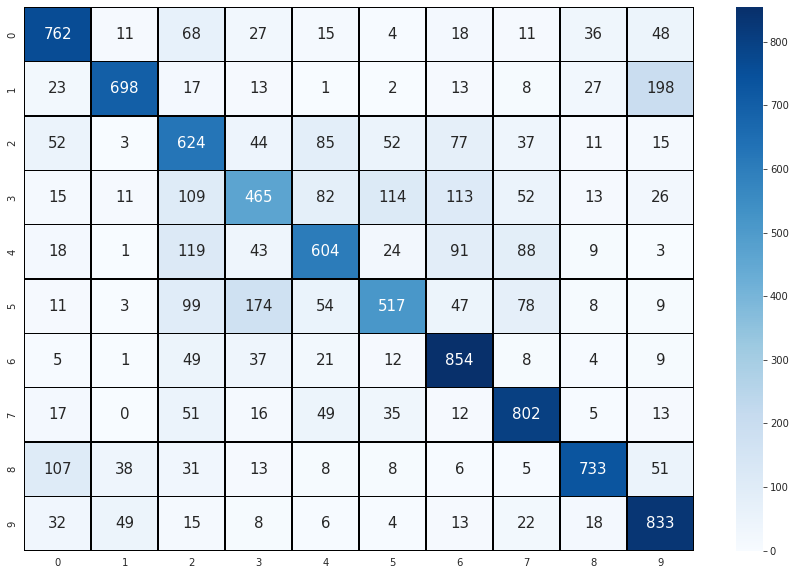

In [48]:
#arabayi en cok truck'la karistirmis mesela, neleri karistiriyorsa image ile bir duzenleme yapilabilir
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [49]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [51]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4792 - accuracy: 0.4640 - val_loss: 1.1111 - val_accuracy: 0.6102
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0691 - accuracy: 0.6212 - val_loss: 0.9381 - val_accuracy: 0.6821
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9251 - accuracy: 0.6759 - val_loss: 0.8781 - val_accuracy: 0.6981
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8398 - accuracy: 0.7043 - val_loss: 0.7983 - val_accuracy: 0.7286
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7781 - accuracy: 0.7258 - val_loss: 0.7826 - val_accuracy: 0.7322
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7267 - accuracy: 0.7446 - val_loss: 0.7329 - val_accuracy: 0.7497
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6927 - accuracy: 0.7561 - val_loss: 0.7075 - val_accur

In [52]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.479,0.464,1.111,0.610
1,1.069,0.621,0.938,0.682
2,0.925,0.676,0.878,0.698
3,0.840,0.704,0.798,0.729
4,0.778,0.726,0.783,0.732
5,0.727,0.745,0.733,0.750
6,0.693,0.756,0.707,0.758
7,0.652,0.769,0.742,0.741
8,0.623,0.781,0.738,0.748


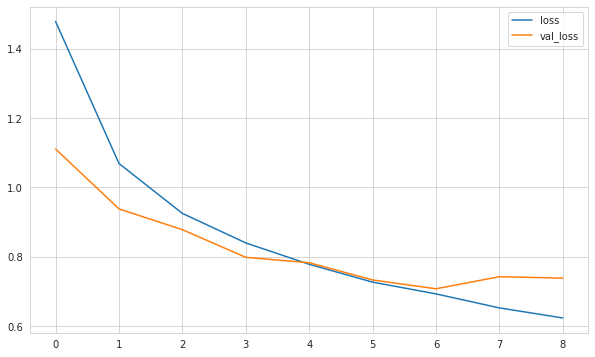

In [53]:
#4'te overfitting basliyor, onceki modele gore overfitting'i biraz otelemeyi basardim
#drop out ekledim overfitting ile mucadele icin ve early stop ekledim
summary[["loss", "val_loss"]].plot();

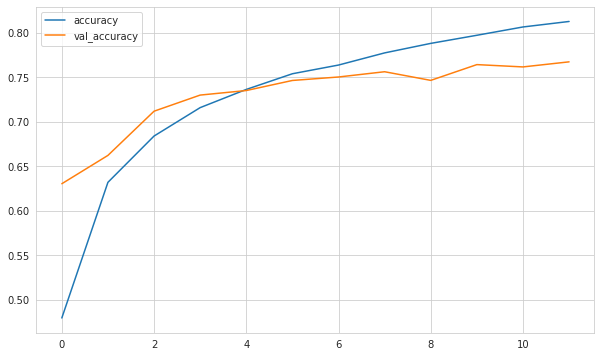

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [54]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7075 - accuracy: 0.7581


[0.7074539065361023, 0.7580999732017517]

In [55]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7074539065361023
Test accuracy: 0.7580999732017517


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1000
           1       0.83      0.90      0.86      1000
           2       0.75      0.58      0.65      1000
           3       0.64      0.49      0.55      1000
           4       0.67      0.80      0.73      1000
           5       0.62      0.74      0.67      1000
           6       0.80      0.84      0.82      1000
           7       0.82      0.82      0.82      1000
           8       0.87      0.86      0.86      1000
           9       0.83      0.85      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



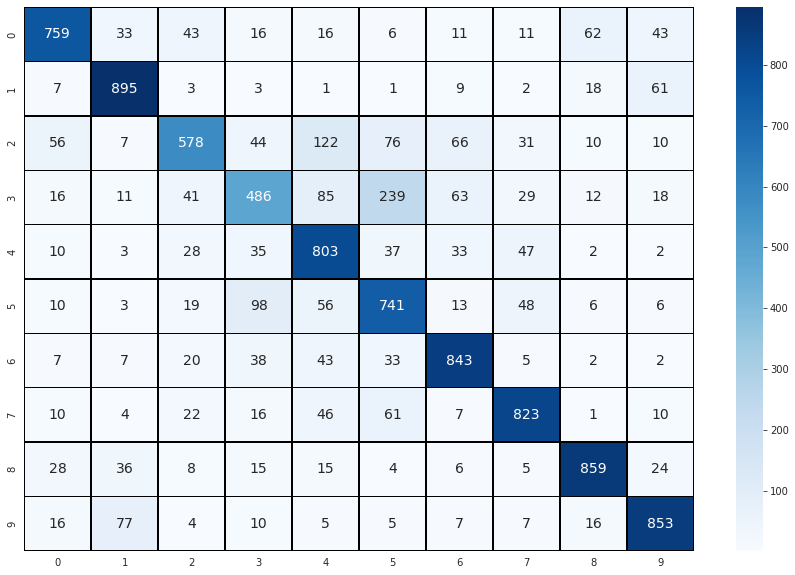

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [57]:
from tensorflow.keras.layers import BatchNormalization
#normalization belirli scala arasina aliyorum datayi
#burada batch batch normalization yapacagim
#ogrenme hizim artacak ayni degelerle ogrenecek
#data dagiliminda buyuk degisiklik varsa (mesela farkli resimler) internal kovaryans shift artiyor bu durumda bunu azaltiyor!!!! onemli
#konvolusyon surecinde katmanlar arttikca vanishing gardient artabilir bunu engelliyor
#tum datayi degil batch batch yaptigim icin noise'i goruyorum.

datanin tamamini ele almak yerine batch batch aliyorum, bu durumda outlier arasindaki farki veya min max degerler arasindaki farkin daha az olabilecegini dusunebiliriz. bu da noise'in etkisini azaltiyor.
tum veri setini tek seferde normalize etsem, verinin tamamindaki noise'in etkisi batch batch normalize etmeme gore daha fazla olacak.

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [58]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [60]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.9557 - accuracy: 0.2943 - val_loss: 1.6986 - val_accuracy: 0.3908
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4413 - accuracy: 0.4808 - val_loss: 1.2456 - val_accuracy: 0.5665
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2437 - accuracy: 0.5676 - val_loss: 1.0180 - val_accuracy: 0.6402
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1096 - accuracy: 0.6216 - val_loss: 1.0262 - val_accuracy: 0.6467
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0066 - accuracy: 0.6643 - val_loss: 0.7762 - val_accuracy: 0.7314
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9325 - accuracy: 0.6920 - val_loss: 0.7138 - val_accuracy: 0.7600
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8716 - accuracy: 0.7156 - val_loss: 0.8364 - val_

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.637,0.794,0.594,0.810
16,0.628,0.800,0.539,0.823
17,0.619,0.803,0.488,0.839
18,0.599,0.808,0.491,0.840
19,0.586,0.812,0.540,0.825


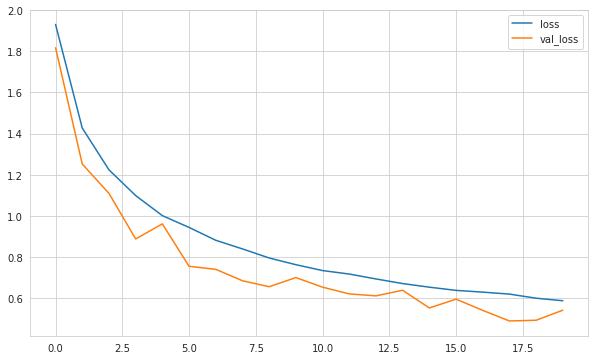

In [ ]:
summary[["loss", "val_loss"]].plot();

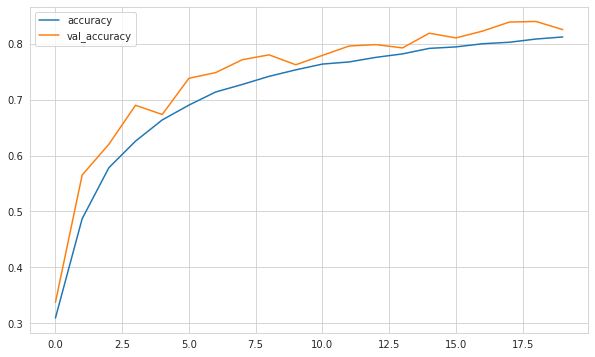

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.4878 - accuracy: 0.8387


[0.4877772331237793, 0.838699996471405]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4877772331237793
Test accuracy: 0.838699996471405


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 1, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.90      0.94      0.92      1000
           2       0.83      0.72      0.77      1000
           3       0.74      0.67      0.70      1000
           4       0.81      0.85      0.83      1000
           5       0.73      0.80      0.76      1000
           6       0.83      0.91      0.87      1000
           7       0.91      0.87      0.89      1000
           8       0.89      0.90      0.89      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



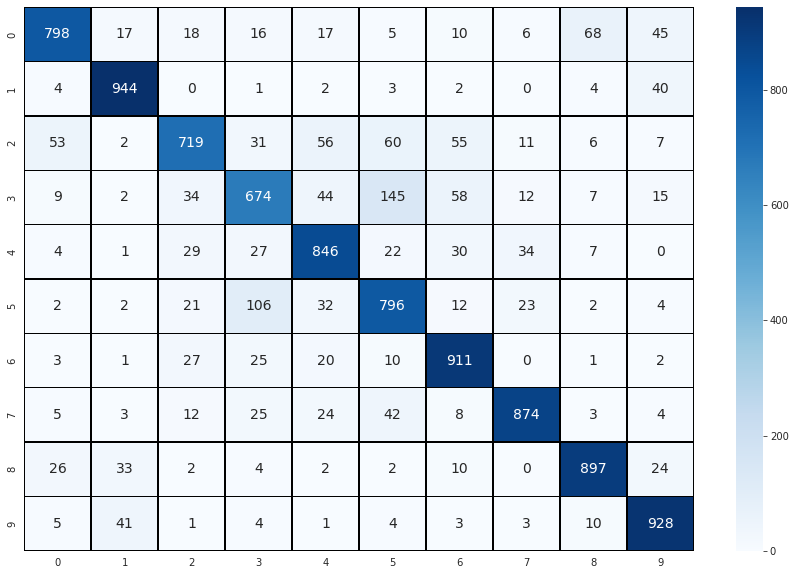

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [ ]:
my_image = X_test[44]

In [ ]:
my_image.shape

(32, 32, 3)

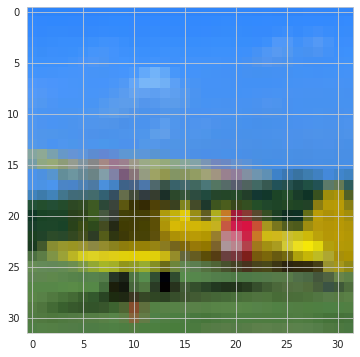

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [ ]:
image_prediction

array([[9.9657565e-01, 4.0117820e-04, 6.2162161e-04, 6.7935463e-05,
        1.7425881e-04, 2.7721346e-05, 2.1557435e-05, 1.0257196e-04,
        1.1007431e-03, 9.0680114e-04]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([0])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([0])

In [ ]:
classes[int(result)]

'airplane'

In [ ]:
model.save("cnn-1.h5")

# finished

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[15].shape

(32, 32, 3)

In [ ]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [ ]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [ ]:
np.argmax(pred)

8

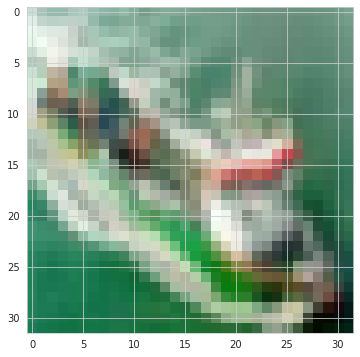

In [ ]:
plt.imshow(X_test[15])

In [ ]:
classes[8]

'ship'